# Notes for scikit-learn tutorial

## 1. [An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)
A few categories for machine learning:
* supervised learning
 * classification
 * regression
* unsupervised learning

In [3]:
# load an example dataset
from sklearn import datasets
digits = datasets.load_digits()
print(digits.data)
print(digits.target)
print(digits.images[0])

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 ..., 8 9 8]
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [9]:
# learning and predicting
# given an image, we need to predict what number it represents.
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
# we need to learn from the data
clf.fit(digits.data[:-1], digits.target[:-1])
# now we can predict 
a = clf.predict(digits.data[-1])
print(a)
# we can also save the model using pickle
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
b = clf2.predict(digits.data[-1])
print(b)
# we can also save and load using joblib.dump and joblib.load

[8]
[8]


## 2. [A tutorial on statistical-learning for scientific data processing](http://scikit-learn.org/stable/tutorial/statistical_inference/index.html)

* Setting and estimator object in scikit-learn
  * Data is in `(n_samples, n_features)` shape
  * Estimator is any object that can learn from data
* Supervised learning: prediction output from observation
  * Implement a `fit(X, y)` method to fit the model
  * Implement the `predict(X)` method to predict the unknown
  * Classification and regression
  * Curse of dimensionality
  * Ridge (decrease contribution but not to zero) and Lasso (can set some coefficients to zero) for regulation
* Model selection: choosing estimators and parameters
  * Score, and cross-validated scores 
  * Cross-validation generator:
    * KFold(n,k): Split it K folds, train on K-1 and then test on left
    * StratifiedKFold(y,k): It preserves the class ratios/lable distribution within each fold
    * LeaveOneOut(n): Leave one observation out
    * LeaveOneLableOut(labels): Take a label array to group observation
  * Grid search and cross-validated estimators
* Unsupervised learning: Seeking represetations of the data
  * Clustering: grouping observations together
    * K-means clustering
    * Hierarchical agglomerative clustering: feature agglomeration and connectivity-constrained clustering
    * PCA and ICA
* Pipelining to put it all together

In [10]:
digits.images.shape

(1797, 8, 8)

In [11]:
# To use this dataset, we need to change it into (n_sampels, n_features) type
data = digits.images.reshape((digits.images.shape[0], -1))
data.shape

(1797, 64)

In [ ]:
# Set up estimator, and use data to train the estimator
estimator = Estimator(param1=1, param2=2)
estimator.fit(data) 

In [15]:
# Iris example for classification using KNN
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
# split data into train and test
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
# create and fit a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()        # initilize the model
knn.fit(iris_X_train, iris_y_train) # train the model
knn.predict(iris_X_test)            # predict the test data

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [16]:
iris_y_test   # see if the prediction is correct

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [17]:
# Linear model for regression
from sklearn import linear_model
# load data, and setup train and test data
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_y_train = diabetes.target[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_test  = diabetes.target[-20:]
# setup linear regression model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)   # train the model
regr.score(diabetes_X_test, diabetes_y_test)   # Explained variance score: 1 is perfect, 0 is no linear relationship.

0.58507530226905713

In [19]:
X = np.c_[0.5, 1].T
X

array([[ 0.5],
       [ 1. ]])

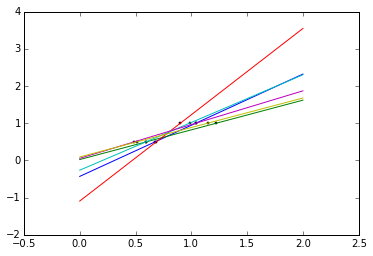

In [21]:
% matplotlib inline
y = [.5, 1]
test = np.c_[0, 2].T
regr = linear_model.LinearRegression()
import pylab as pl
pl.figure
np.random.seed(0)
for _ in range(6):  # _ is a throwaway variable
    this_X = .1 * np.random.normal(size=(2,1)) + X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test))
    pl.scatter(this_X, y, s=3)

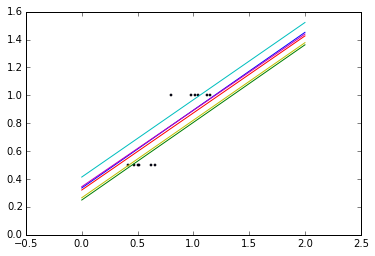

In [24]:
# In the above case, noise in observation induces high variance.
# We can shrink the regression coefficients to zeros.
# This is an example of bias/variance tradeoff.
regr = linear_model.Ridge(alpha=0.1)
pl.figure()
for _ in range(6):
    this_X = .1*np.random.normal(size=(2, 1))+X
    regr.fit(this_X, y)
    pl.plot(test, regr.predict(test))
    pl.scatter(this_X, y, s=3)

In [1]:
# score method for judging the quality of fit (bigger is better)
from sklearn import datasets, svm
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

In [3]:
# K-fold cross validation
from sklearn import cross_validation
k_fold = cross_validation.KFold(n=6, n_folds=3)
for train_indices, test_indices in k_fold:
    print('Train: %s | test: %s' %(train_indices, test_indices))
k_fold

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


sklearn.cross_validation.KFold(n=6, n_folds=3, shuffle=False, random_state=None)

In [4]:
# For above problem, cross-validation can be implemented as
kfold = cross_validation.KFold(len(X_digits), n_folds=3)
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
         for train, test in kfold]

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

In [6]:
# Similar as above with another way
cross_validation.cross_val_score(svc, X_digits, y_digits, cv=kfold, n_jobs=-1)
# n_jobs=-1 means to dispatche all the CPUS

array([ 0.93489149,  0.95659432,  0.93989983])

In [12]:
# Grid Search over certain range, then choose the parameter to maximize the cross-validation score.
from sklearn.grid_search import GridSearchCV
import numpy as np
Cs = np.logspace(-6, -1, 10)   # return numbers spaced evenly on a log scale
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000])
print(clf.best_score_)
print(clf.best_estimator_.C)
print(clf.score(X_digits[1000:], y_digits[1000:]))

0.925
0.00774263682681
0.943538268507


In [13]:
# Nested cross-validation
# Two cross-validation loops are performed:
# One by GridSearchCV to get the parameter
# One by cross_val_score to measure the prediction performance of the estimator.
cross_validation.cross_val_score(clf, X_digits, y_digits)

array([ 0.93853821,  0.96327212,  0.94463087])

In [15]:
# Cross-validation to set a parameter can be done more efficiently on an glorightm-by-algorithm basis.
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
lasso.fit(X_diabetes, y_diabetes)
lasso.alpha_                        # The estimator chose automatically its lambda

0.012291895087486173

In [16]:
# K-means clustering
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)
print(k_means.labels_[::10])
print(y_iris[::10])

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [17]:
# Principal Component Analysis (PCA), A=LC
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = x1 + x2
X = np.c_[x1, x2, x3]
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)
print(pca.explained_variance_)

# reconstruct 
pca.n_components = 2
X_reduced = pca.fit_transform(X)
X_reduced.shape

[  3.28214165e+00   1.12888955e+00   9.74311909e-33]


(100, 2)

In [18]:
# Independent Component Analysis (ICA) selects components so that the distribution of their loadings carries a maximum amount of independent information.
time = np.linspace(0, 10 , 2000)
s1 = np.sin(2 * time)  
s2 = np.sign(np.sin(3 * time))
S = np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape)  # add noise
S /= S.std(axis=0)                         # standilize data
A = np.array([[1, 1], [0.5, 2]])
X = np.dot(S, A.T)
ica = decomposition.FastICA()              # fast ICA
S_ = ica.fit_transform(X)                  # extracted source
A_ = ica.mixing_.T                         # mixing matrix
np.allclose(X, np.dot(S_, A_) + ica.mean_)

True

In [20]:
# Pipeline to put together
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# Do PCA
pca.fit(X_digits)

# Do prediction
n_components = [20, 40 ,64]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using '__' separated parameter names
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, logistic__C=Cs))
estimator.fit(X_digits, y_digits)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, n_components=None, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'logistic__C': array([  1.00000e-04,   1.00000e+00,   1.00000e+04]), 'pca__n_components': [20, 40, 64]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

## 3. [Working with text data](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)


In [21]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [23]:
print(len(twenty_train.data))
print(len(twenty_train.filenames))

2257
2257


In [24]:
# Tokenizing text: build a dictionary fo features 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [25]:
# TF-IDF: Term Frequency times Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

In [26]:
# Above, we first fit the model and then transform the count-matrix to a tf-idf representation.
# Actually, this can be done together.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [27]:
# Train a classifer using naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

# Predict 
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)
for doc, category in zip(docs_new, predicted):
    print('%r=>%s' % (doc, twenty_train.target_names[category]))

'God is love'=>soc.religion.christian
'OpenGL on the GPU is fast'=>comp.graphics


In [28]:
# Build a pipeline
# make the vectorizer=>transformer=>classifier easier
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', MultinomialNB())])
# train the model with a single command
text_clf = text_clf. fit(twenty_train.data, twenty_train.target)

In [29]:
# Evaluation the performance on the test set
twenty_test = fetch_20newsgroups(subset='test',
                                 categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.83488681757656458

In [30]:
# Parameter tuning using grid search
from sklearn.grid_search import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3)}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(twenty_train.data[:400], twenty_train.target[:400])
twenty_train.target_names[gs_clf.predict(['God is love'])]

'soc.religion.christian'

In [31]:
best_parameters, score, _ = max(gs_clf.grid_scores_, key=lambda x: x[1])
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
score

clf__alpha: 0.01
tfidf__use_idf: True
vect__ngram_range: (1, 2)


0.93000000000000005

In [38]:
a = gs_clf.grid_scores_
max(a)

mean: 0.93000, std: 0.02878, params: {'vect__ngram_range': (1, 2), 'tfidf__use_idf': True, 'clf__alpha': 0.01}